<a href="https://colab.research.google.com/github/Ekeneobi/RE-Market-Automated-Subscription-Project/blob/main/CalgaryRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [16]:
calgary = pd.read_csv('https://api.apify.com/v2/datasets/a4oH2fbnk6BrH7xEE/items?attachment=true&clean=true&format=csv')
# Copying data to another variable to avoid any changes to original data
data = calgary.copy()

In [17]:
data.head()

,address/city,address/community,address/neighborhood,address/state,address/streetAddress,address/subdivision,address/zipcode,bathrooms,bedrooms,currency,...,photos/54,photos/55,photos/56,photos/57,photos/58,photos/59,price,url,yearBuilt,zpid
0,Calgary,NaN,NaN,AB,20 W Saddlestone Grv NE,NaN,T3J0Z6,5.0,6.0,CAD,...,NaN,NaN,NaN,NaN,NaN,NaN,709900,https://www.zillow.com/homedetails/20-W-Saddle...,2018.0,2060357499
1,Calgary,NaN,NaN,AB,10 S Brentwood Cmn NW #905,NaN,T2L2L6,1.0,2.0,CAD,...,NaN,NaN,NaN,NaN,NaN,NaN,282500,https://www.zillow.com/homedetails/10-S-Brentw...,2015.0,2060357673
2,Calgary,NaN,NaN,AB,219 N 90th Ave SE #84,NaN,T2J0A3,1.0,2.0,CAD,...,NaN,NaN,NaN,NaN,NaN,NaN,249900,https://www.zillow.com/homedetails/219-N-90th-...,1970.0,2060357420
3,Calgary,NaN,NaN,AB,1211 S Auburn Bay Cir SE,NaN,T3M1S6,3.0,2.0,CAD,...,NaN,NaN,NaN,NaN,NaN,NaN,335000,https://www.zillow.com/homedetails/1211-S-Aubu...,2012.0,2060357031
4,Calgary,NaN,NaN,AB,993 N Citadel Dr NW,NaN,T3G3X4,3.0,6.0,CAD,...,NaN,NaN,NaN,NaN,NaN,NaN,589900,https://www.zillow.com/homedetails/993-N-Citad...,1994.0,2060357253


In [18]:
data.drop(data.iloc[:, 18:78], inplace=True, axis=1)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address/city           1713 non-null   object 
 1   address/community      0 non-null      float64
 2   address/neighborhood   0 non-null      float64
 3   address/state          1713 non-null   object 
 4   address/streetAddress  1713 non-null   object 
 5   address/subdivision    153 non-null    object 
 6   address/zipcode        1711 non-null   object 
 7   bathrooms              1686 non-null   float64
 8   bedrooms               1672 non-null   float64
 9   currency               1713 non-null   object 
 10  datePostedString       1713 non-null   object 
 11  daysOnZillow           1713 non-null   int64  
 12  description            1713 non-null   object 
 13  homeStatus             1713 non-null   object 
 14  homeType               1713 non-null   object 
 15  lati

In [19]:
data.drop(data.columns[[0,1,2,3,5,9,11,12,13,19,21]], inplace=True, axis=1)
data.head()

,address/streetAddress,address/zipcode,bathrooms,bedrooms,datePostedString,homeType,latitude,livingArea,longitude,price,yearBuilt
0,20 W Saddlestone Grv NE,T3J0Z6,5.0,6.0,2022-12-20,SINGLE_FAMILY,51.125633,1798.0,-113.925575,709900,2018.0
1,10 S Brentwood Cmn NW #905,T2L2L6,1.0,2.0,2022-12-20,APARTMENT,51.086967,505.0,-114.128296,282500,2015.0
2,219 N 90th Ave SE #84,T2J0A3,1.0,2.0,2022-12-20,TOWNHOUSE,50.972137,NaN,-114.067085,249900,1970.0
3,1211 S Auburn Bay Cir SE,T3M1S6,3.0,2.0,2022-12-20,TOWNHOUSE,50.884705,1144.0,-113.953030,335000,2012.0
4,993 N Citadel Dr NW,T3G3X4,3.0,6.0,2022-12-20,SINGLE_FAMILY,51.140408,1364.0,-114.172340,589900,1994.0


In [20]:
data.shape

(1713, 11)

In [21]:
data.rename(columns={'price':'Price','bathrooms':'Bathrooms','bedrooms':'Bedrooms','homeType':'Hometype','address/streetAddress':'Address','address/zipcode':'ZipCode','datePostedString':'DatePosted','livingArea':'Area','yearBuilt':'YearBuilt', 'latitude':'Latitude','longitude':'Longitude'}, inplace=True)
data.head()

,Address,ZipCode,Bathrooms,Bedrooms,DatePosted,Hometype,Latitude,Area,Longitude,Price,YearBuilt
0,20 W Saddlestone Grv NE,T3J0Z6,5.0,6.0,2022-12-20,SINGLE_FAMILY,51.125633,1798.0,-113.925575,709900,2018.0
1,10 S Brentwood Cmn NW #905,T2L2L6,1.0,2.0,2022-12-20,APARTMENT,51.086967,505.0,-114.128296,282500,2015.0
2,219 N 90th Ave SE #84,T2J0A3,1.0,2.0,2022-12-20,TOWNHOUSE,50.972137,NaN,-114.067085,249900,1970.0
3,1211 S Auburn Bay Cir SE,T3M1S6,3.0,2.0,2022-12-20,TOWNHOUSE,50.884705,1144.0,-113.953030,335000,2012.0
4,993 N Citadel Dr NW,T3G3X4,3.0,6.0,2022-12-20,SINGLE_FAMILY,51.140408,1364.0,-114.172340,589900,1994.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     1713 non-null   object 
 1   ZipCode     1711 non-null   object 
 2   Bathrooms   1686 non-null   float64
 3   Bedrooms    1672 non-null   float64
 4   DatePosted  1713 non-null   object 
 5   Hometype    1713 non-null   object 
 6   Latitude    1713 non-null   float64
 7   Area        959 non-null    float64
 8   Longitude   1713 non-null   float64
 9   Price       1713 non-null   int64  
 10  YearBuilt   1664 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 147.3+ KB


In [30]:
data['Region'] = data.Address.apply(lambda x: 'North East' if 'NE'or '' in x else('North West' if 'NW' in x else('South East' if 'SE' in x else ('South West' if 'SW' in x else x ))))
data['DatePosted'] = pd.to_datetime(data['DatePosted'], format='%Y-%m-%d')
data['YearBuilt'] = pd.to_datetime(data['YearBuilt'], format='%Y')
data.head()

,Address,ZipCode,Bathrooms,Bedrooms,DatePosted,Hometype,Latitude,Area,Longitude,Price,YearBuilt,Region
0,20 W Saddlestone Grv NE,T3J0Z6,5.0,6.0,2022-12-20,SINGLE_FAMILY,51.125633,1798.0,-113.925575,709900,2018-01-01,North East
1,10 S Brentwood Cmn NW #905,T2L2L6,1.0,2.0,2022-12-20,APARTMENT,51.086967,505.0,-114.128296,282500,2015-01-01,North West
2,219 N 90th Ave SE #84,T2J0A3,1.0,2.0,2022-12-20,TOWNHOUSE,50.972137,NaN,-114.067085,249900,1970-01-01,South East
3,1211 S Auburn Bay Cir SE,T3M1S6,3.0,2.0,2022-12-20,TOWNHOUSE,50.884705,1144.0,-113.953030,335000,2012-01-01,South East
4,993 N Citadel Dr NW,T3G3X4,3.0,6.0,2022-12-20,SINGLE_FAMILY,51.140408,1364.0,-114.172340,589900,1994-01-01,North West


In [25]:
data.to_csv('calgaryre.csv',index=False)

In [32]:
data['Price'].describe().transpose()

count    1.713000e+03
mean     7.183343e+05
std      6.988249e+05
min      0.000000e+00
25%      4.099000e+05
50%      5.850000e+05
75%      7.990000e+05
max      8.500000e+06
Name: Price, dtype: float64

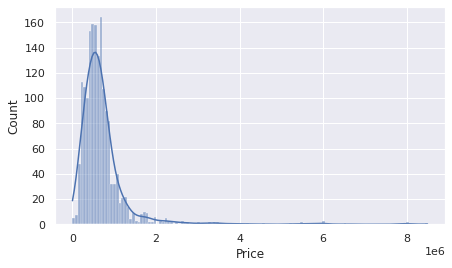

In [33]:
# let's plot all the price to look at its distributions
plt.figure(figsize = (7, 4))
sns.histplot(data = data, x = data['Price'], kde = True)
plt.show()